# Compare task vs rest adjusted rand index

In [1]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.functional_profiles as fp
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from scipy import stats
import glob
import numpy as np




/Users/callithrix/Documents/Projects/Functional_Fusion/code/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
files = sorted(
    glob.glob(f'{ut.model_dir}//Models/Evaluation/nettekoven_68/ARI_*'))

list_of_dfs = []
for f, file in enumerate(files):
    t = pd.read_csv(file, delimiter='\t')
    list_of_dfs.append(t)
    t['source'] = file.split('/')[-1].strip('.tsv')

D = pd.concat(list_of_dfs, ignore_index=True).reset_index(drop=True)
D.drop_duplicates(subset=D.columns.difference(['source']))

D.shape

(280, 7)

In [16]:
figsize = (10, 10)
crits = ['dcbc_group', 'dcbc_indiv']


# Symmetric / Asymmetric indicator
for r, row in D.iterrows():
    if 'sym' in row['source']:
        D.loc[r, 'symmetry'] = 'symmetric'
    else:
        D.loc[r, 'symmetry'] = 'asymmetric'


D.tail()
D.columns


Index(['model_name', 'atlas', 'K', 'train_data', 'train_loglik', 'ari',
       'source', 'symmetry'],
      dtype='object')

<Figure size 1000x1000 with 0 Axes>

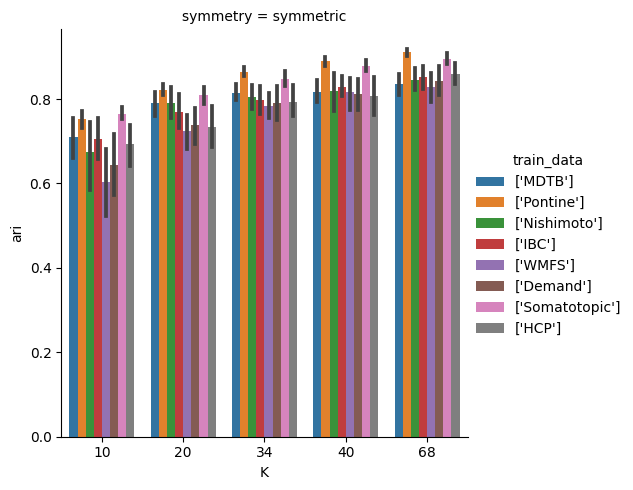

In [21]:

plt.figure(figsize=figsize)
sb.catplot(
    data=D, x="K", y="ari", col="symmetry", hue="train_data", kind="bar")

